# 위기탈출 헬 조선 (Fall-Semester Data Base Project)

## 1. data Processing

### 1.1 load the libraries

In [6]:
#import the libraries For data analysis 
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn

In [7]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

### 1.2Load the dataset for using this project

In [60]:
#Load the data into variable
traffic_data = pd.read_csv('./data/traffic/traffic-accident-2012_2017.csv')
tax_data = pd.read_csv('./data/tax/tax_total.csv')
crime_2015_data = pd.read_csv('./data/crime/crime-city-2015_1.csv')
crime_2016_data = pd.read_csv('./data/crime/crime-city-2016_1.csv')
#population_data = pd.read_csv('./data/population/population.csv')


### 1.3 Create the data and Convert data

#### 1.3.1 Convert the Traffic accident data

In [36]:
#check the traffic dataset 
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27255 entries, 0 to 27254
Data columns (total 7 columns):
발생년       27255 non-null int64
발생년월일시    27255 non-null int64
주야        27255 non-null object
요일        27255 non-null object
사망자수      27255 non-null int64
사상자수      27255 non-null int64
발생지       27255 non-null object
dtypes: int64(4), object(3)
memory usage: 1.5+ MB


In [9]:
#Grouping of traffic_accident data in day using pandas 'isin'
search_year = ['2015']
traffic_2015 = traffic_data.loc[traffic_data['발생년'].isin(search_year),:].groupby("요일").size() #2015s traffic accident
search_year = ['2016']
traffic_2016 = traffic_data.loc[traffic_data['발생년'].isin(search_year),:].groupby("요일").size() #2016s traffic accident

In [16]:
#Using numpy transpose series to Array
A = np.asarray(traffic_2015)
Traffic_day_2015 = A.transpose()
A = np.asarray(traffic_2016)
Traffic_day_2016= A.transpose()

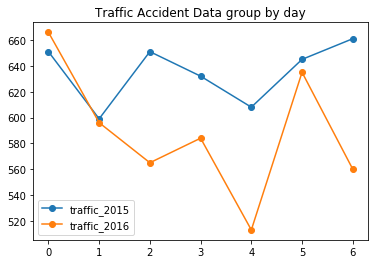

In [28]:
#visulation the traffic data
plt.plot(Traffic_day_2015, '-o', label= 'traffic_2015')
plt.title("Traffic Accident Data group by day")
plt.plot(Traffic_day_2016, '-o', label= 'traffic_2016')
plt.legend(loc='lower left')

#### 1.3.2  "4C"the Crime_city data

In [37]:
#Check the dataset of Crime data
crime_2015_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 57 columns):
범죄대분류     38 non-null object
범죄중분류     38 non-null object
계         38 non-null int64
서울        38 non-null int64
부산        38 non-null int64
대구        38 non-null int64
인천        38 non-null int64
광주        38 non-null int64
대전        38 non-null int64
울산        38 non-null int64
경기 부천     38 non-null int64
경기 수원     38 non-null int64
경기 성남     38 non-null int64
전북 전주     38 non-null int64
경기 안양     38 non-null int64
충북 청주     38 non-null int64
경남 창원     38 non-null int64
경기 광명     38 non-null int64
경북 포항     38 non-null int64
경기 안산     38 non-null int64
경남 진주     38 non-null int64
경기 고양     38 non-null int64
제주        38 non-null int64
전남 목포     38 non-null int64
경기 의정부    38 non-null int64
전북 익산     38 non-null int64
전북 군산     38 non-null int64
경북 구미     38 non-null int64
충남 천안     38 non-null int64
전남 여수     38 non-null int64
강원 춘천     38 non-null int64
강원 원주     38 non-null int64

In [63]:
#Check the "범죄대분류"
print(crime_2015_data["범죄대분류"])

0     강력범죄
1     강력범죄
2     강력범죄
3     강력범죄
4     강력범죄
5     강력범죄
6     강력범죄
7     강력범죄
8     절도범죄
9     폭력범죄
10    폭력범죄
11    폭력범죄
12    폭력범죄
13    폭력범죄
14    폭력범죄
15    폭력범죄
16    폭력범죄
Name: 범죄대분류, dtype: object


In [65]:
#Clean the "지능범죄 to 기타범죄"
crime_2015_data.drop(crime_2015_data.index[[range(17,38)]], inplace=True)
crime_2016_data.drop(crime_2016_data.index[[range(17,38)]], inplace=True)

In [67]:
print(crime_2016_data)

   범죄대분류         범죄중분류        계      서울      부산     대구      인천     광주     대전  \
0   강력범죄          살인기수      356      46      29     17      20      9     16   
1   강력범죄         살인미수등      558     100      43     12      28      8      9   
2   강력범죄            강도    1,149     260     137     51      88     47     35   
3   강력범죄            강간    5,155   1,129     314    197     347    170    171   
4   강력범죄          유사강간      583     123      28     37      47     21     14   
5   강력범죄          강제추행   16,054   4,667     951    632   1,176    488    420   
6   강력범죄  기타 강간  강제추행등      408      72      30     14      27     15     15   
7   강력범죄            방화    1,502     286      98     68      84     38     44   
8   절도범죄          절도범죄  203,037  46,861  16,777  9,171  10,025  6,050  6,981   
9   폭력범죄            상해   50,028   6,949   4,637  2,863   2,289  1,309  1,415   
10  폭력범죄            폭행  165,803  39,337   9,749  7,457  11,762  4,797  5,121   
11  폭력범죄        체포  감금    1,318     268 

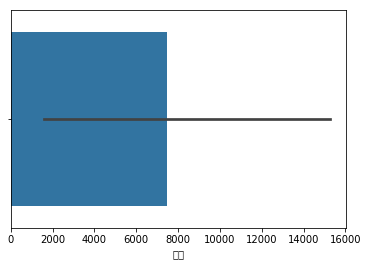

In [69]:
sns.barplot(crime_2015_data['서울'])

## 

Text(0.5,1,'연도별 교통사고 통계(요일별)')

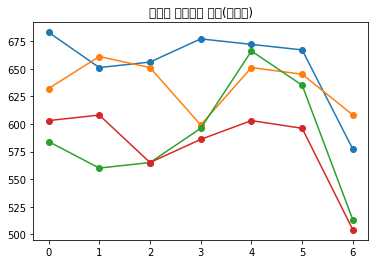

In [56]:
#plt.plot(df_tf_2014_city[df_tf_2014_city['city']], df_tf_2014_city['amount'], label="2014")
#plt.legend(loc='upper left)

#Plotting the traffic data
#fig= plt.figure()
#axs_traffic = fig.add_subplot(211)
#axs_traffic.plot(traffic_accident)
#axs_traffic.legend(loc='upper left')
plt.plot(Traffic, '-o', label= 'traffic_data')
#plt.plot(traffic_accident, '-o', label= 'traffic_data')
plt.title("연도별 교통사고 통계(요일별)")